<a href="https://colab.research.google.com/github/kishore-R10/Linear-Regression-tasks/blob/main/ground%20cricket%20chirps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment5**


Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

Tasks
1. Find the linear regression equation for this data.
Chart the original data and the equation on the chart.
2. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
4. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000




1.   Median and mean are closer to each other - there is less skew in the data




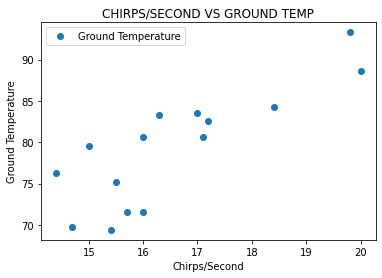

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
df.plot(x='Chirps/Second',y='Ground Temperature',style='o')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.title('CHIRPS/SECOND VS GROUND TEMP')

plt.show()
df.corr()



1.   No transformation required.
2.   There is a good relation between CHIRPS/SECOND and GROUND TEMP.



In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

# **Scaling**

---



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# **Modelling**

---



In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 

regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([76.36358509, 77.89680896, 76.97687464, 89.54931041, 74.83036121])

# **Tasks**

**1.Find the linear regression equation for this data.**

In [ ]:
# y = mx + c
# y- predicted value , m & c - parameters and x - feature

**2.Chart the original data and the equation on the chart.**

Text(0.5, 1.0, 'Chirps/Second VS Ground Temperature')

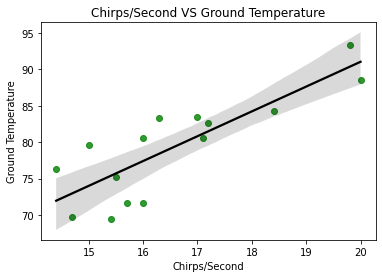

In [ ]:
sns.regplot(x = df['Chirps/Second'],y = df['Ground Temperature'],scatter_kws = {'color':'green'},line_kws = {'color':'black'})
plt.title('Chirps/Second VS Ground Temperature')

**3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.**

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

df.corr()

R2- SCORE: 0.672674621591977


,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


1.   No transformation required.
2.   There is a good relation between CHIRPS/SECOND and GROUND TEMP.


**4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [ ]:
print(regressor.intercept_) # - c
print(regressor.coef_) # slope - m

# predicted score(y = ground temperature )  = 3.06644775 * (Chirps/Second) + 28.833644968128247
# 95 - 28.833644968128247 =  3.06644775 * (Chirps/Second)
# 66.16635503187176/3.06644775 = Chirps/Second
# Chirps/Second = 21.57752566691272

print('Approximate rate at the crickets will be chirping is',(95-regressor.intercept_)/regressor.coef_)

28.833644968128247
[3.06644775]
Approximate rate at the crickets will be chirping is [21.57752567]


**5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?**

In [ ]:
print('The temperature will be',regressor.predict([[18]]))

The temperature will be [84.02970446]
